In [4]:
import requests #Importamos la librería requests para llamar la API

In [5]:
api_key="RGAPI-18749939-8e35-4a4e-8bc6-62f882b39b0d" #Esta se actualiza cada 24 horas

In [6]:
#Ingresamos las variables de region y match_id para realizar pruebas, la idea es que uno podría buscar manualmente sus partidas cambiando estas variables
region="americas" 
match_id="LA2_1339220769"

In [9]:
def get_match_data(region, match_id, api_key):
    api_url = (
        "https://" +
        region +
        ".api.riotgames.com/lol/match/v5/matches/" +
        match_id +
        "?api_key=" +
        api_key
    )
    
    resp = requests.get(api_url)
    data = resp.json()
    
    return data

In [36]:
def getPuuid(name):
    name_url = ("https://la2.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + name + "?api_key="+api_key)
    resp_name = requests.get(name_url)
    data_name = resp_name.json()
    puuid = data_name['puuid']
    return puuid

In [38]:
puuid = getPuuid("esplo")

In [56]:
puuid

'8MIr_wZDUkiEbOe-oYkH__RbsTIM8L89CnNlaJW9610fIOuc3Jdc0tT-VyJMXgoDT4FYKVQiVIkHXQ'

In [15]:
match_data = get_match_data(region, match_id, api_key)

In [41]:
def didwin(puuid, match_data):
    part_index=match_data['metadata']['participants'].index(puuid)
    return match_data['info']['participants'][part_index]['win']
    

In [40]:
match_data['metadata']['participants'].index(puuid) #INDICA EL NUMERO DE PARTICIPANTE QUE SOY


5

In [55]:
part_index=match_data['metadata']['participants'].index(puuid)
match_data['info']['participants'][part_index]['championName']

'Leona'

In [42]:
didwin(puuid,match_data)

False

In [73]:
def get_matches(api_key):
    api_url_match = ('https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/8MIr_wZDUkiEbOe-oYkH__RbsTIM8L89CnNlaJW9610fIOuc3Jdc0tT-VyJMXgoDT4FYKVQiVIkHXQ/ids?start=0&count=40&api_key='+api_key)
    response_match = requests.get(api_url_match)
    data_match = response_match.json()
    return data_match

In [74]:
matches = get_matches(api_key)

In [71]:
def get_champion(puuid, match_data):
    part_index=match_data['metadata']['participants'].index(puuid)
    return match_data['info']['participants'][part_index]['championName']

In [91]:
array_champions = {}

for match_id in matches:
    match_data = get_match_data(region, match_id, api_key)
    campeon = get_champion(puuid, match_data)
    resultado = didwin(puuid, match_data)

    if campeon == 'Caitlyn':
        clave = f'{campeon}, {resultado}'
        array_champions[clave] = array_champions.get(clave, 0) + 1
    if campeon == 'Kaisa':
        clave = f'{campeon}, {resultado}'
        array_champions[clave] = array_champions.get(clave, 0) + 1
    

print(array_champions)


{'Kaisa, False': 3, 'Kaisa, True': 3, 'Caitlyn, False': 6, 'Caitlyn, True': 4}


In [77]:
import matplotlib.pyplot as plt

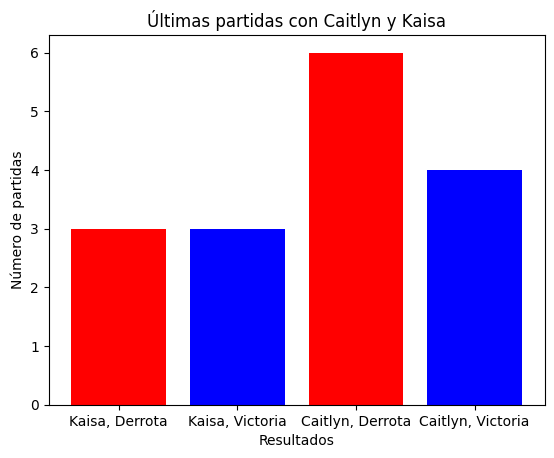

In [117]:
# Separar los datos en listas para las barras
campeones = list(array_champions.keys())
resultados = [array_champions[campeon] for campeon in campeones]

# Colores para las barras (rojo para False, azul para True)
colores = ['red' if 'False' in campeon else 'blue' for campeon in campeones]

# Modificar las etiquetas
etiquetas = [f'{campeon.split(",")[0]}, Derrota' if 'False' in campeon else f'{campeon.split(",")[0]}, Victoria' for campeon in campeones]

# Crear el gráfico de barras
plt.bar(etiquetas, resultados, color=colores)

# Añadir etiquetas y título
plt.xlabel('Resultados')
plt.ylabel('Número de partidas')
plt.title('Últimas partidas con Caitlyn y Kaisa')

# Mostrar el gráfico
plt.show()

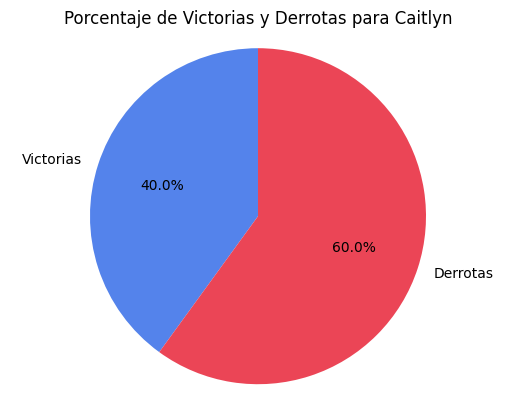

In [114]:
# Calcular porcentajes
porcentaje_true = array_champions['Caitlyn, True'] / sum(array_champions.values()) * 100
porcentaje_false = array_champions['Caitlyn, False'] / sum(array_champions.values()) * 100

# Etiquetas y tamaños para las partes de la torta
etiquetas = ['Victorias', 'Derrotas']
tamanos = [porcentaje_true, porcentaje_false]

# Colores para las partes de la torta
colores = ['#5483eb', '#eb4556']

# Crear el gráfico de torta
plt.pie(tamanos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# Añadir etiquetas y título
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Porcentaje de Victorias y Derrotas para Caitlyn')

# Mostrar el gráfico
plt.show()

In [110]:
amountFalse=0
amountTrue=0
for match_id in matches:
    match_data = get_match_data(region, match_id, api_key)
    campeon = get_champion(puuid, match_data)
    resultado = didwin(puuid, match_data)
    if resultado == True:
        amountTrue += 1
    else:
        amountFalse += 1
print(f'Cantidad de Victorias {amountTrue}, Cantidad de Derrotas {amountFalse}')

Cantidad de Victorias 14, Cantidad de Derrotas 26


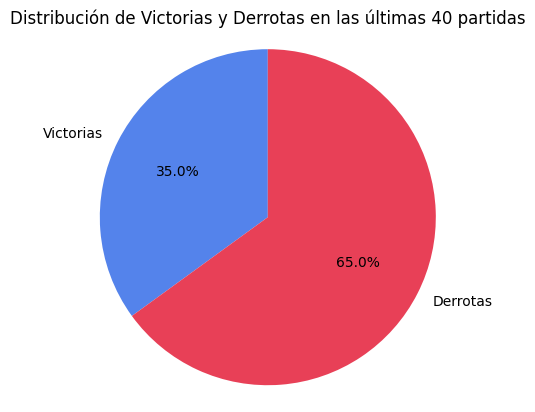

In [113]:
# Etiquetas y tamaños para las partes de la torta
etiquetas = ['Victorias', 'Derrotas']
tamanos = [amountTrue, amountFalse]

# Colores para las partes de la torta (celeste claro para victorias y rojo claro para derrotas)
colores = ['#5483eb', '#e84057']

# Crear el gráfico de torta
plt.pie(tamanos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# Añadir etiquetas y título
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de Victorias y Derrotas en las últimas 40 partidas')

# Mostrar el gráfico
plt.show()